In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-01-FUNDAMENTOS/master/init.py
import init; init.init(force_download=False); 

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
from IPython.display import Image

# Ejemplos NumPy

En este punto ya debes haber explorado las bases de NumPy, sino, recuerda hacerlo primero. Acá simplemente se mostrarán algunos usos. Se mostrará también algunos ejemplos de matplotlib, que se estudiará más adelante.

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

## Procesar una imagen

Supongamos que tenemos una imagen como la siguiente

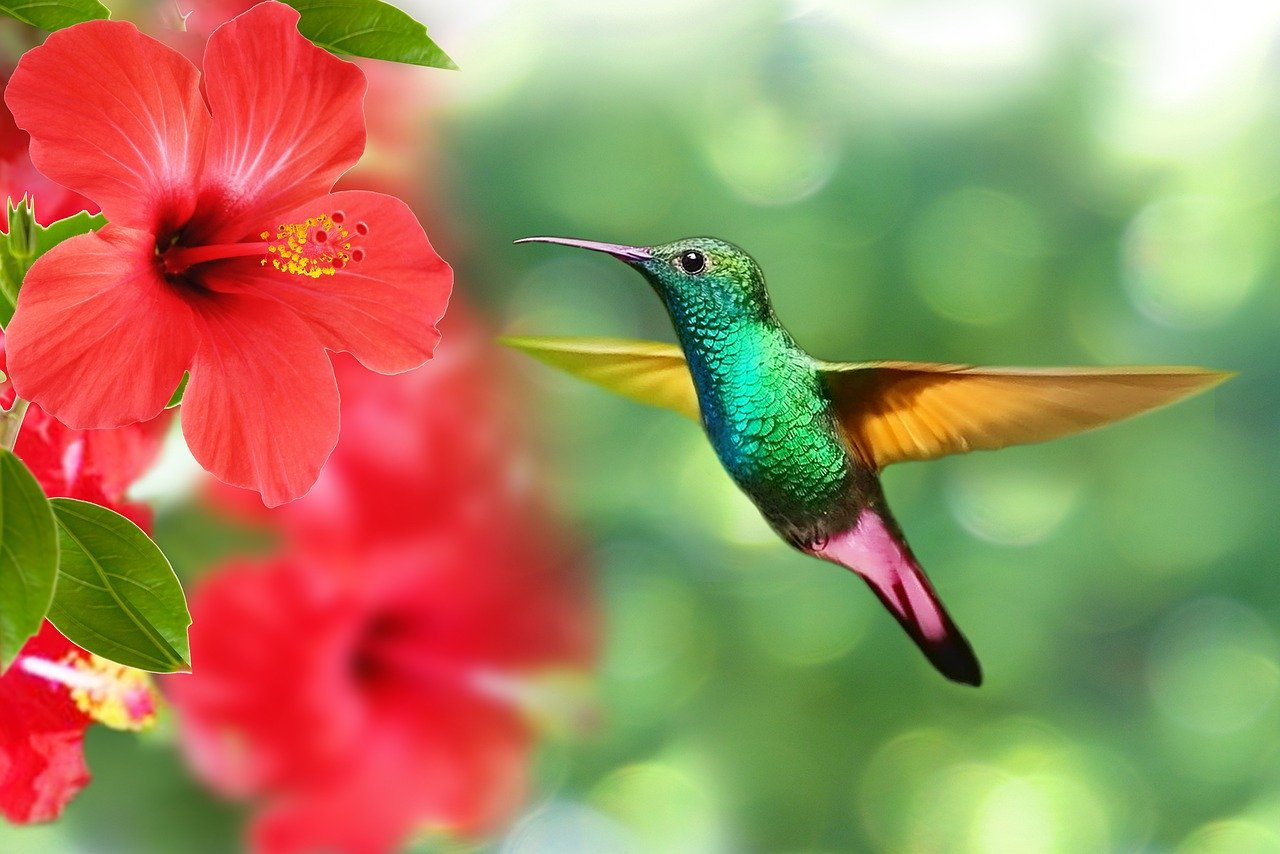

In [5]:
Image("local/imgs/colibri.jpg")

Esa imagen se puede representar en Python como un arreglo de 3 dimenciones: height, width, depth.

In [6]:
img = cv2.cvtColor(cv2.imread("local/imgs/colibri.jpg", cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)

In [7]:
img.shape

(854, 1280, 3)

el arreglo es bastante grande y carece de sentido imprimirlo en el notebook, vamos a imprimir solo un pedacito, usando los índices.

In [8]:
img[:4, :5]

array([[[ 54,  89,   0],
        [ 60,  95,   5],
        [ 62,  97,   7],
        [ 59,  94,   4],
        [ 58,  94,   4]],

       [[ 61,  96,   4],
        [ 57,  92,   0],
        [ 51,  86,   0],
        [ 50,  85,   0],
        [ 54,  91,   0]],

       [[ 55,  89,   0],
        [ 55,  89,   0],
        [ 56,  91,   0],
        [ 59,  94,   0],
        [ 60,  95,   1]],

       [[ 56,  90,   0],
        [ 54,  88,   0],
        [ 57,  91,   0],
        [ 63,  99,   1],
        [ 66, 102,   6]]], dtype=uint8)

igualmente inútil....

Algo que sí es útil es extraer una región que nos intere, por ejemplo, supongamos que queremos sacar el colibrí únicamente

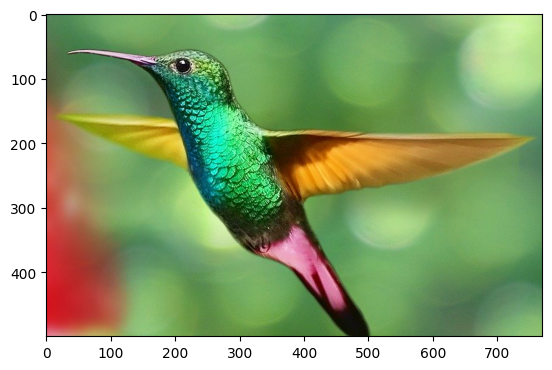

In [9]:
colibri = img[180: 680, 480:-30]
plt.imshow(colibri)

Podemos utilizar muchas funciones de NumPy para hacer cosas con imágenes

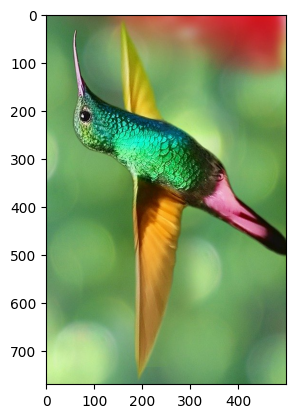

In [10]:
plt.imshow(np.transpose(colibri, (1, 0, 2)))

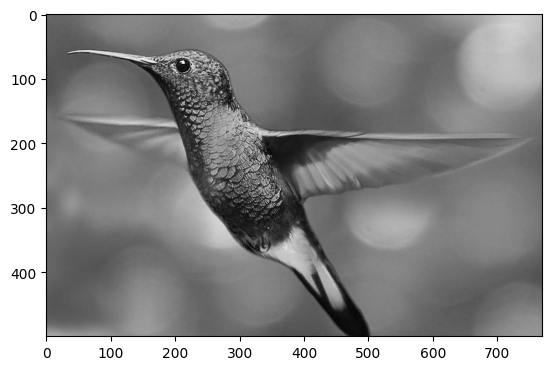

In [11]:
plt.imshow(np.mean(colibri, axis=2), cmap="gray")

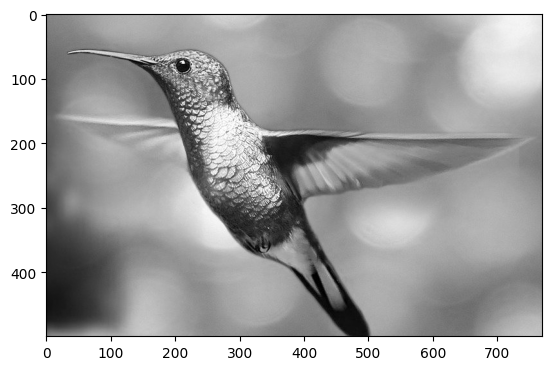

In [12]:
plt.imshow(colibri[..., 1], cmap="gray")

## Estimando una regresión lineal

**NO** es el momento para hablar de Machine Learning, pero vale la pena mencionar un ejemplo de cómo NumPy puede ser usado en el campo de la ciencia de datos. Acá un extracto tomado de [un trabajo que dejé empezando](https://github.com/srcolinas/Machine-Learning-Open-Cookbook/blob/master/linear_regression/notebook_01.ipynb).

**Advertencia**: esto no es una explicación completa de regressiones lineales!

>- Predictions: $\hat{Y} = X \mathbf{w}$
>- Loss function: $ L = \| Y - X \mathbf{w} \| _{2}^{2}$
>- Solution by normal equations: $ \mathbf{w} = (X^{T}X)^{-1} X^{T}Y$

La siguiente función nos genera unos datos sintéticos para poder realizar nuestra regresión lineal básica.

In [13]:
w_real = 0.9

In [14]:
def make_regression_problem(w):
    b = 0
    X_real = np.linspace(0, 1, 1000000).reshape(-1,1)
    b_noise = 0.1 * np.random.rand(X_real.shape[0], 1)
    y_real = w * X_real + b + b_noise
    sample_size = 60
    indices = np.random.randint(X_real.shape[0], size=sample_size)
    X, y = X_real[indices, 0], y_real[indices]
    return X, y

In [15]:
X, y = make_regression_problem(w_real)

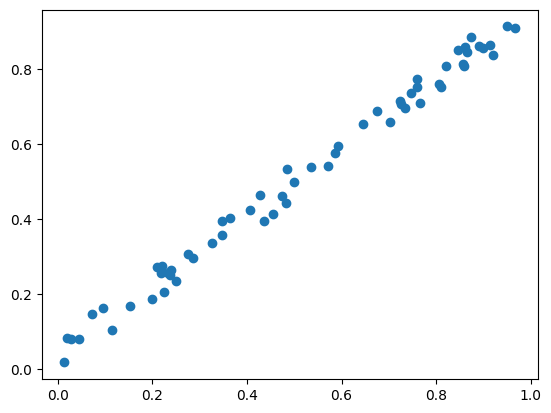

In [16]:
plt.scatter(X, y)

Ahora podemos implementar nuestra propia regresión lineal

In [17]:
def predictions(X, w):
    X_ = np.expand_dims(X, axis=-1)
    return np.dot(X_, w)[..., 0]

In [18]:
def solve_linear_regression(X, y):
    X_ = np.expand_dims(X, axis=-1)
    XTX = np.dot(X_.T, X_)
    XTX_inv = np.linalg.inv(XTX)
    XTy = np.dot(X_.T, y)
    w = np.dot(XTX_inv, XTy)
    return w

In [19]:
w_pred = solve_linear_regression(X, y)

In [20]:
y_pred = predictions(X, w_pred)

In [21]:
def plot_model_line_with_points(w, X, y):
    xmin, xmax = np.min(X), np.max(X)
    X_real = np.linspace(xmin, xmax, 1000000).reshape(-1,1)
    if isinstance(w, float):
        w = np.array([[w]])
    y_pred = predictions(X_real, w_pred)
    plt.plot(X_real[:, 0], y_pred)
    plt.scatter(X, y)

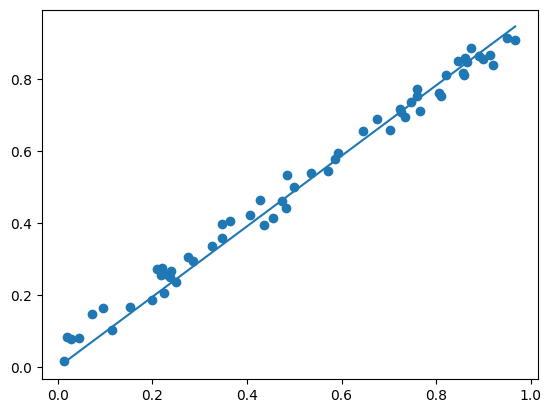

In [22]:
plot_model_line_with_points(w_real, X, y)

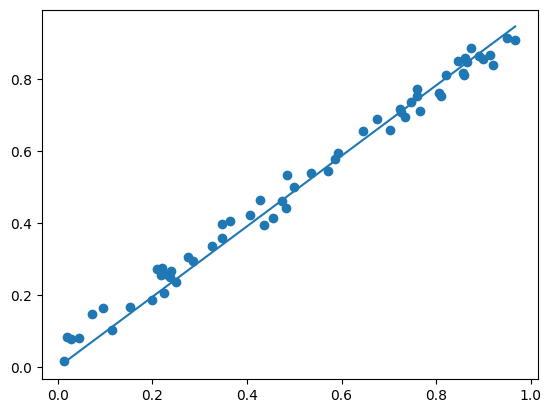

In [23]:
plot_model_line_with_points(w_pred, X, y)

Y ¿cómo calculamos cuánto se equivoca nuestro modelo?

In [24]:
def mean_squared_error(y_true, y_pred):
    diff = y_true - y_pred
    return np.mean(diff**2)

In [25]:
mean_squared_error(y, y_pred)

np.float64(0.1523087843560383)